オリジナルの作成: 2016/04/30

<html>
	<author>Hiroshi TAKEMOTO</author>
	(<email>take.pwave@gmail.com</email>)
	
	<h1>Sageノートブックを使ったTheano入門</h1>
	<h2>theanoの参考サイト</h2>
	<p>
		Theanoに限らず機械学習の分野では 
		<a href="http://aidiary.hatenablog.com/">人工知能に関する断創録</a>
		の素晴らしさがが突出しています。
	</p>
	<p>	
		ここでは、
		 <a href="http://aidiary.hatenablog.com/">人工知能に関する断創録</a>
		 のTheanoに関連する記事をSageのノートブックで実装し、Thenoの修得を試みます。	
	</p>
	<p>
		最近では、誰でも簡単にDeeepLearningを体験できるtensorflowが注目されていますが、
		「人工知能に関する断創録」の作者が言われているように
		「TheanoはDeep Learning Tutorialをはじめ、実装例が豊富にあり、絶妙な粒度で小回りもきくので手法の勉強にちょうどよいんだよね。」
		というのがとても納得できます。		
	</p>
	<p>
		今回は、
		<a href="http://www.amazon.co.jp/dp/4061529021/">深層学習 (機械学習プロフェッショナルシリーズ)</a>
		をベースに以下の内容をSageのノートブックで試します。
		<ul>
			<li>
				<a href="http://aidiary.hatenablog.com/archive/category/Theano">人工知能に関する断創録のtheano関連記事</a>
			</li>
		</ul>		
	</p>
</html>

<html>
	<h2>theanoのインストール</h2>
	<p>
		Sageでtheanoを使うには、以下の手順でtheanoのインストールが必要です。
		<pre>
$ sage -sh
(sage-sh)  $ easy_install theano
Searching for theano
Reading https://pypi.python.org/simple/theano/
Best match: Theano 0.8.2

途中省略
Installed /Users/take/local/sage-6.9/local/lib/python2.7/site-packages/Theano-0.8.2-py2.7.egg
Processing dependencies for theano
Finished processing dependencies for theano

(sage-sh)  $ exit			
		</pre>
		
		<ul>
			<li>
				私の公開している
				<a href="http://www15191ue.sakura.ne.jp:8000/">Sageサーバ</a>
				にもtheano 0.8.2をインストールしました
			</li>
		</ul>
	</p>
</html>

<html>
	<h2>Theanoの使い方</h2>
	<h3>必要なライブラリのimport</h3>
	<p>
		最初に、theanoを使うのに必要なライブラリをインポートします。
	</p>
</html>

In [1]:
import numpy as np
import theano
import theano.tensor as T

<html>
	<h3>変数宣言</h3>
	<p>
		Sageと同様にTheanoも関数を定義するために、
		変数（Theanoではシンボル: TensorVariableと呼ぶらしい）を宣言します。
	</p>
	<p>
		Theanoの変数宣言は以下の様なルールになっています。
		<pre>
変数 = T.型タイプ()			
		</pre>
		型には、d: Double、f: Float、l: Longが指定され、
		タイプには、scalar: 値、vector: ベクトル、matrix: 行列が指定されます。
	</p>
	<p>
		Theanoでは、シンボルで定義した関数を実行時にコンパイルします。
	</p>
	<p>
		それでは、人工知能に関する断創録の例題に沿って、変数の宣言、関数の定義、関数のコンパイルを実行してみましょう。
	</p>
</html>

In [2]:
# シンボルの生成
# xはdoubleのスカラー型
x = T.dscalar('x')
print type(x)

<class 'theano.tensor.var.TensorVariable'>


In [3]:
# シンボルを組み立てて数式を定義（これもまたシンボル）
y = x ** 2
print type(y)

<class 'theano.tensor.var.TensorVariable'>


In [4]:
# シンボルを使って関数を定義
# ここでコンパイルされる
f = theano.function(inputs=[x], outputs=y)
print type(f)

<class 'theano.compile.function_module.Function'>


In [5]:
# 関数を使ってxに具体的な値を入れてyを計算
print f(1)
print f(2)
print f(3)
print f(4)

1.0
4.0
9.0
16.0


<html>
	<h3>テンソル</h3>
	<p>
		Theanoでは、スカラー、ベクトル、行列などを抽象化した概念テンソル（Tensor）を導入し、
		theano.tensorで定義されており、インポート部でこれをTと宣言し、同じ関数定義を
		ベクトルや行列に簡単に拡張することができます。
	</p>
</html>

In [6]:
x = T.dvector('x')
y = x ** 2
f = theano.function(inputs=[x], outputs=y)
print f([1,2,3])

[ 1.  4.  9.]


In [7]:
x = T.dmatrix('x')
y = x ** 2
f = theano.function(inputs=[x], outputs=y)
print f([[1,2,3], [4,5,6]])

[[  1.   4.   9.]
 [ 16.  25.  36.]]


<html>
	<h3>シグモイド関数の例</h3>
	<p>
		ニューラルネットの活性化関数で使われているシグモイド関数、
$$ 
	s(x) = \frac{1}{1 - e^{-x}}
$$		
		をTheanoで実装します。
	</p>
	<p>
		その前に、Sageのplot関数を使ってシグモイド関数の形を見てみましょう。
	</p>
</html>

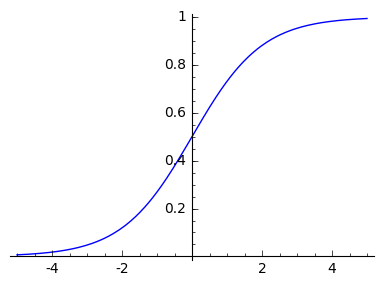

In [8]:
# シグモイド関数をSageでプロット
x = var('x')
s(x) = 1/(1 + exp(-x))
plot(s(x), [x, -5, 5], figsize=4)

<html>
	<p>
		Theanoでの実装は以下の様になります。
	</p>
	<p>
		入力を行列の形式で与えているので、結果も各入力値に対するシグモイド関数の値が行列として返されます。
	</p>
</html>

In [9]:
# Theanoでシグモイド関数を定義
## シンボルを定義
x = T.dmatrix('x')
## シンボルを組み合わせて数式を定義
s = 1 / (1 + T.exp(-x))
## シンボルを使って関数化
sigmoid = theano.function(inputs=[x], outputs=s)

# 実際の値を使って計算
print sigmoid([[0, 1], [-1, -2]])

[[ 0.5         0.73105858]
 [ 0.26894142  0.11920292]]


<html>
	<h3>共有変数</h3>
	<p>
		Theanoの共有変数がGPUのメモリと密接に関係しているという説明を読んで、GPUのメモリに合わせてfloat型
		(theano.config.floatX)にしたり、値の取得にget_value()というメソッドを使っていることが納得できました。
	</p>
	<p>
		私の環境ではGPUが使えないため、type(X)の型は、theano.tensor.sharedvar.TensorSharedVariableでした。
	</p>
	
</html>

In [10]:
# データを共有変数に読み込む
data = np.array([[1,2,3], [4,5,6]], dtype=theano.config.floatX)
X = theano.shared(data, name='X', borrow=True)
print type(X)
print X.get_value()

<class 'theano.tensor.sharedvar.TensorSharedVariable'>
[[ 1.  2.  3.]
 [ 4.  5.  6.]]


<html>
	<h3>線形回帰モデルの例</h3>
	<p>
		共有変数の例として、線形回帰のモデル式が使われています。
		回帰モデルは以下の式で、Wとbが共有変数としてyを求めてみます。
$$
y = W x + b
$$			
	</p>
	<p>
		共有変数は値を取得するときにはget_valueが必要ですが、関数を表す式を定義するときにはシンボルと同様に
		使えるのは良く出来ているとなぁと思いました。
	</p>
</html>

In [11]:
# 共有変数の定義
# 具体的な数値で初期化
W = theano.shared(np.array([[1,2,3], [4,5,6]], dtype=theano.config.floatX),
                  name='W',
                  borrow=True)
b = theano.shared(np.array([1, 1], dtype=theano.config.floatX),
                  name='b',
                  borrow=True)

In [12]:
# 共有変数の値の取得
print W.get_value()
print b.get_value()

[[ 1.  2.  3.]
 [ 4.  5.  6.]]
[ 1.  1.]


In [13]:
# シンボルの生成
x = T.vector('x')
# シンボルと共有変数を組み立てて数式を定義
y = T.dot(W, x) + b
print type(y)
# 関数を定義
f = theano.function([x], y)

<class 'theano.tensor.var.TensorVariable'>


In [14]:
# 関数の使用
print f([1, 1, 1])

[  7.  16.]


<html>
	<h2>Theanoの自動微分</h2>
	<p>
		Theanoの特徴の一つに自動微分があります。ニューラルネットの計算で、入力値から予測値を計算するフィードフォワードに対し、
		予測結果と正解のずれを誤差関数Eとして表し、重みWの値を更新するバックプロパゲーションでは、誤差関数Eの微分が必要になります。
$$
	w^{\tau+1)} = w^{(\tau)} - \mu \Delta E(w^{\tau})
$$		
	</p>
	<p>
		PRMLの第5章にある多層パーセプトロン関数近似をSageで試した
		<a href="http://www.pwv.co.jp/~take/TakeWiki/index.php?sage%2FPRML-%20%E5%A4%9A%E5%B1%A4%E3%83%91%E3%83%BC%E3%82%BB%E3%83%97%E3%83%88%E3%83%AD%E3%83%B3%E9%96%A2%E6%95%B0%E8%BF%91%E4%BC%BC">sage/PRML- 多層パーセプトロン関数近似</a>
		では、PRMLの式の変換を手でお復習いして、確認しました。
		この作業はとても手間が掛かり、ミスも多くなります。
	</p>	
	<p>
		(注 特にニューラルネットの計算はとても時間が掛かるため、実務でニューラルネットを使った場合、式のミスをリカバリすのはとても大変です。)		
	</p>
</html>

<html>
	<h3>例1　2次関数</h3>
	<p>
		以下のような2次関数の微分をTheanoの自動微分を使って計算してみましょう。
$$
	y = x^2
$$		
		高校で習った微分の公式から、以下の様になりますね。
$$
	\frac{dy}{dx} = 2 x
$$		
	</p>
</html>

<html>
	<p>
		これをTheanoの自動微分を使って解いてみましょう。
	</p>
	<p>
		微分は、T.grad()のcostに微分される式のシンボル（ｙ）、wrtに微分する変数のシンボルを与えて計算します。
	</p>
</html>

In [15]:
# シンボルxを宣言する
x = T.dscalar('x')

# 微分される数式のシンボルを定義
y = x ** 2

# yをxに関して微分
gy = T.grad(cost=y, wrt=x)

<html>
	<p>
		微分結果のシンボル（gy）は、そのままでは使えないので、function()で関数かしてから使用します。
	</p>
	<p>
		微分の結果を表示するには、theano.pp()を使って表示します。
	</p>
</html>

In [16]:
# 微分係数を求める関数を定義
f = theano.function(inputs=[x], outputs=gy)
print theano.pp(f.maker.fgraph.outputs[0])

(TensorConstant{2.0} * x)


In [17]:
# 具体的なxを与えて微分係数を求める
print f(2)
print f(3)
print f(4)

4.0
6.0
8.0


<html>
   <h3>Sageの微分を使う</h3>
	<p>
		どんな時も代替手段を持っておくことが大切です。ある方法で上手く行かないとき、
		なぜ正しく動かないのかを別の方法の結果と比較することで修正することができます。
	</p>
	<p>
		Sageの計算は、numpyやTheanoのように速くありませんが、比較的数式に近い形式で計算することができます。
	</p>
	<p>
		Sageの数式処理を使って上記の2次関数の微分を試してみましょう。diffが数式の微分を行う関数です。
	</p>
</html>

In [18]:
# sageの微分を使って同じ処理を試してみる
# 変数xを宣言
x = var('x')

# yを表す数式を定義
y = x^2

# yをxで微分し、その結果をf(x)に代入する
f(x) = diff(y, x)
print f(x)

2*x


In [19]:
# 具体的なxを与えて微分係数を求める
print f(2)
print f(3)
print f(4)

4
6
8


<html>
	<h3>例３　指数関数</h3>
	<p>
		例２の指数関数を省略して、例３のsin(x)を計算します。
$$
y = sin(x)
$$		
$$
\frac{dy}{dx} = cos(x)
$$
		を計算します。
	</p>
</html>

In [20]:
# シンボルxを宣言する
x = T.dscalar('x')

# 微分される数式のシンボルを定義
y = T.sin(x)

# yをxに関して微分
gy = T.grad(cost=y, wrt=x)

# 微分係数を求める関数を定義
f = theano.function(inputs=[x], outputs=gy)
print theano.pp(f.maker.fgraph.outputs[0])

cos(x)


In [21]:
# 具体的なxを与えて微分係数を求める
print f(0)
print f(np.pi / 2)
print f(np.pi)

1.0
6.12323399574e-17
-1.0


<html>
	<h3>例4　多項式</h3>
	<p>
		今度は、例4の多項式です。
$$
	y = (x - 4)(x^2 + 6)
$$		
$$
	\frac{dy}{dx} = 3 x^2 - 8x + 6
$$
	</p>
</html>

In [22]:
# シンボルxを宣言する
x = T.dscalar('x')

# 微分される数式のシンボルを定義
y = (x - 4) * (x ** 2 + 6)

# yをxに関して微分
gy = T.grad(cost=y, wrt=x)

# 微分係数を求める関数を定義
f = theano.function(inputs=[x], outputs=gy)
print theano.pp(f.maker.fgraph.outputs[0])

Elemwise{Composite{(i0 + sqr(i1) + (i2 * (i3 + i1) * i1))}}(TensorConstant{6.0}, x, TensorConstant{2.0}, TensorConstant{-4.0})


In [23]:
# 具体的なxを与えて微分係数を求める
print f(0)
print f(1)
print f(2)

6.0
1.0
2.0


<html>
	<p>
		結果の式のi0, i1, i2, i3は、次の括弧のTensorConstant{6.0}, x, TensorConstant{2.0}, TensorConstant{-4.0}に対応します。
		これをxの式に書き直すと以下の様になります。
		<pre>
6 + x**2 + (2*(-4+x)*x)			
		</pre>
	</p>
	<p>
		この式を手計算で整理する代わりにSageで確認してみましょう。dyに上記の式を代入し、expand()関数で展開してshow()で表示するだけです。
		このように簡単に結果を確認できますよ。 
	</p>
</html>

In [24]:
x = var('x')
dy = 6 + x**2 + (2*(-4+x)*x)
show(dy.expand())

3*x^2 - 8*x + 6

<html>
	<h3>例６　偏微分</h3>
	<p>
		例５を省略して、例６の偏微分を試してみます。
	</p>
	<p>
		以下の式zをx, yでそれぞれ偏微分します。
$$
z = (x + 2y)^2
$$		
$$
\frac{\partial{z}}{\partial{x}} = 2(x + 2y) 
$$
$$
\frac{\partial{z}}{\partial{y}} = 4(x + 2y) 
$$
	</p>
</html>

In [25]:
# シンボルxを宣言する
x = T.dscalar('x')
y = T.dscalar('y')

# 微分される数式のシンボルを定義
z = (x + 2 * y) ** 2

# zをxに関して偏微分
gx = T.grad(cost=z, wrt=x)

# zをyに関して偏微分
gy = T.grad(cost=z, wrt=y)

# 微分係数を求める関数を定義
fgx = theano.function(inputs=[x, y], outputs=gx)
fgy = theano.function(inputs=[x, y], outputs=gy)
print theano.pp(fgx.maker.fgraph.outputs[0])
print theano.pp(fgy.maker.fgraph.outputs[0])

Elemwise{Composite{(i0 * (i1 + (i2 * i3)))}}(TensorConstant{2.0}, x, TensorConstant{2.0}, y)
Elemwise{Composite{(i0 * (i1 + (i2 * i3)))}}(TensorConstant{4.0}, x, TensorConstant{2.0}, y)


In [26]:
# 具体的な値を与えて偏微分係数を求める
print fgx(1, 2)
print fgx(2, 2)
print fgy(1, 2)
print fgy(2, 2)

10.0
12.0
20.0
24.0


<html>
	<p>
		最後にSageで偏微分を試してみましょう。
	</p>
	<p>
		x, yの変数をvar関数で定義し、zの数式を定義します。偏微分はdiff関数の微分変数を変えるだけです。
	</p>
	<p>
		非常に簡単にfgx, fgyを計算できるのがお分かり頂けると思います。
	</p>
</html>

In [27]:
# sageの微分を使って同じ処理を試してみる
# 変数xを宣言
x, y = var('x y')

# yを表す数式を定義
z = (x + 2 * y) ** 2

# yをxで微分し、その結果をfgx, fgyに代入する
fgx(x, y) = diff(z, x)
fgy(x, y) = diff(z, y)
print fgx
print fgy

(x, y) |--> 2*x + 4*y
(x, y) |--> 4*x + 8*y


In [28]:
print fgx(1, 2)
print fgx(2, 2)
print fgy(1, 2)
print fgy(2, 2)

10
12
20
24
